### 차원 축소
* 학습 데이터 크기를 줄여서 학습 시간 절약
* 불필요한 피처들을 줄여서 모델 성능 향상에 기여
* 다차원의 데이터를 3차원 이하의 차원 축소를 통해서 시각적으로 보다 쉽게 데이터 패턴 인지

피처 선택: 특정 피처에 종속성이 강한 불피요한 피처는 아예 제거하고, 데이터의 특징을 잘 나타내는 주요 피처만 선택

피처 추출: 기존 피처를 저차원의 중요 피처로 압축해서 추출하는 것

#### 1. 공분산

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore', category= RuntimeWarning)

# Eating, exercise habbit and their body shape
df = pd.DataFrame(columns=['calory', 'breakfast', 'lunch', 'dinner', 'exercise', 'body_shape'])

df.loc[0] = [1200, 1, 0, 0, 2, 'Skinny']
df.loc[1] = [2800, 1, 1, 1, 1, 'Normal']
df.loc[2] = [3500, 2, 2, 1, 0, 'Fat']
df.loc[3] = [1400, 0, 1, 0, 3, 'Skinny']
df.loc[4] = [5000, 2, 2, 2, 0, 'Fat']
df.loc[5] = [1300, 0, 0, 1, 2, 'Skinny']
df.loc[6] = [3000, 1, 0, 1, 1, 'Normal']
df.loc[7] = [4000, 2, 2, 2, 0, 'Fat']
df.loc[8] = [2600, 0, 2, 0, 0, 'Normal']
df.loc[9] = [3000, 1, 2, 1, 1, 'Fat']

In [35]:
 y_target= df["body_shape"]
 X_train = df.drop(["body_shape"], axis=1)

In [36]:
from sklearn. preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(X_train)

In [37]:
X_std

array([[-1.35205803,  0.        , -1.3764944 , -1.28571429,  1.        ],
       [ 0.01711466,  0.        , -0.22941573,  0.14285714,  0.        ],
       [ 0.61612771,  1.29099445,  0.91766294,  0.14285714, -1.        ],
       [-1.18091145, -1.29099445, -0.22941573, -1.28571429,  2.        ],
       [ 1.89972711,  1.29099445,  0.91766294,  1.57142857, -1.        ],
       [-1.26648474, -1.29099445, -1.3764944 ,  0.14285714,  1.        ],
       [ 0.18826125,  0.        , -1.3764944 ,  0.14285714,  0.        ],
       [ 1.04399418,  1.29099445,  0.91766294,  1.57142857, -1.        ],
       [-0.15403193, -1.29099445,  0.91766294, -1.28571429, -1.        ],
       [ 0.18826125,  0.        ,  0.91766294,  0.14285714,  0.        ]])

###### 1.1 Covariance Matrix of Features

In [38]:
import numpy as np

features = X_std.T
covarinace_matrix = np.cov(features)
covarinace_matrix


array([[ 1.11111111,  0.88379717,  0.76782385,  0.89376551, -0.93179808],
       [ 0.88379717,  1.11111111,  0.49362406,  0.81967902, -0.71721914],
       [ 0.76782385,  0.49362406,  1.11111111,  0.40056715, -0.76471911],
       [ 0.89376551,  0.81967902,  0.40056715,  1.11111111, -0.63492063],
       [-0.93179808, -0.71721914, -0.76471911, -0.63492063,  1.11111111]])

######  1.2 고유벡터 와 고윳값 with 공분산 행렬

In [39]:
eig_vals, eig_vecs = np.linalg.eig(covarinace_matrix)

In [40]:
eig_vals

array([4.0657343 , 0.8387565 , 0.07629538, 0.27758568, 0.2971837 ])

In [41]:
eig_vecs

array([[-0.508005  , -0.0169937 , -0.84711404,  0.11637853,  0.10244985],
       [-0.44660335, -0.36890361,  0.12808055, -0.63112016, -0.49973822],
       [-0.38377913,  0.70804084,  0.20681005, -0.40305226,  0.38232213],
       [-0.42845209, -0.53194699,  0.3694462 ,  0.22228235,  0.58954327],
       [ 0.46002038, -0.2816592 , -0.29450345, -0.61341895,  0.49601841]])

In [42]:
eig_vals[0]/sum(eig_vals)

0.7318321731427544

###### 1.3 project data into selected

In [43]:

projected_x = X_std.dot(eig_vecs.T[0]) # T  transpose 행과 열을 바꿔주는 것이다.

In [44]:
result = pd.DataFrame(projected_x, columns=['PC1'])
result['y-axis']=0.0
result['label']= y_target


In [57]:
result

,PC1,y-axis,label
0,2.226009,0.0,Skinny
1,0.018143,0.0,Normal
2,-1.762966,0.0,Fat
3,2.735424,0.0,Skinny
4,-3.027115,0.0,Fat
5,2.147026,0.0,Skinny
6,0.371425,0.0,Normal
7,-2.592399,0.0,Fat
8,0.393478,0.0,Normal
9,-0.509025,0.0,Fat


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


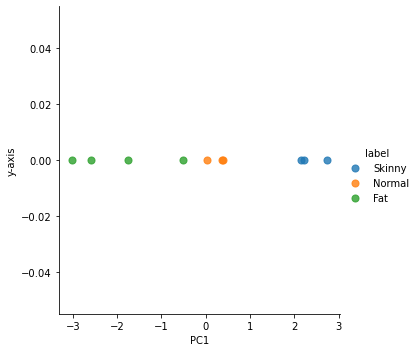

In [52]:
sns.lmplot('PC1', 'y-axis', data= result, scatter_kws={'s':50},hue='label', fit_reg=False)

##### SKlearn PCA 라이브러리 이용

In [55]:
from sklearn.decomposition import PCA

pca = PCA(n_components=1)
df_pca = pca.fit_transform(X_std)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


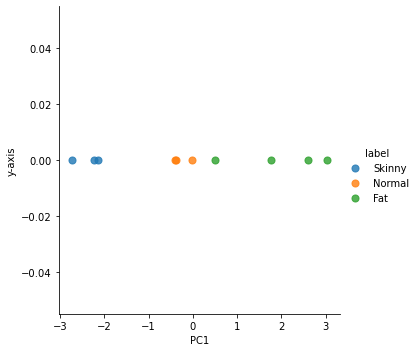

In [59]:
df_pca

result = pd.DataFrame(df_pca, columns=['PC1'])
result['y-axis']=0.0
result['label']= y_target

sns.lmplot('PC1', 'y-axis', data= result, scatter_kws={'s':50},hue='label', fit_reg=False)

In [60]:
#### 붓꽃 데이터로 해보기 pca 2로 해보기

In [63]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn. preprocessing import StandardScaler

iris = load_iris()
columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
irisDF = pd.DataFrame(iris.data, columns=columns)
irisDF['target'] = iris.target


In [64]:

iris_scaled = StandardScaler().fit_transform(irisDF)

In [74]:
pca  = PCA(n_components=1)
pca.fit(iris_scaled)
iris_pca = pca.transform(iris_scaled)

pca_columns = ['pca_component_1']
irisDF_pca = pd.DataFrame(iris_pca, columns = pca_columns)
irisDF_pca['target']=iris.target



In [75]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

rcf = RandomForestClassifier(random_state=156)

X_train, X_test, y_train, y_test = train_test_split(irisDF_pca, irisDF_pca, random_state=156)
scores = cross_val_score(rcf, irisDF_pca, iris.target, scoring = 'accuracy', cv =3)





print(scores)

[0.98 1.   1.  ]
